### Import all necessary tools and packages

#### Specify directory for the plots to be safed to 

In [1]:
# import functions and modules
## add repository path to importable files
import sys
sys.path.append('../')

import os
import matplotlib.pyplot as plt

from IPython.display import display, Markdown, Math, Latex

## import functions for batch simulation
from simulationFunctions.save_load_simulations import load_mean_var_mf
from simulationFunctions.simulationTools import *

## import caching wrapper
from tools.analysis_reproduction import save_load
import tools.analysis_reproduction

import cacheModel

from simulationFunctions.master_load_function import gather_simulations

import os 

# Specify the directory for the plots

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
# relative path to the directory of the notebook
save_to = '../../latex/plots/'
plot_dir = os.path.join(ROOT_DIR, save_to)

### Hit rate calculation

Calculating hit rates for caches.  
\begin{align}
& n - \text{nr item} \\
& m - \text{nr simulations} \\
& \rho_\sigma - \text{request rate of item } \sigma \\
& c - \text{cache}
\end{align}
The mean simulation hit rate is calculated by: 
            $$ Mean^H_c(t) = \sum_k^m \sum_\sigma^n \frac{1}{m} \rho_\sigma X^{(k)}_{\sigma, c}(t) $$

The standard deviation of the hit rates by:
            $$ STD^H_c(t) = \sqrt{\sum_k^m \frac{1}{m}\left( \sum_\sigma^n \rho_\sigma X_{\sigma,c}^{(k)}(t) \right)^2 - \left( \sum_k^m\frac{1}{m}\sum_\sigma^n \rho_\sigma X_{\sigma, c}^{(k)}(t) \right)^2 } $$
            
Hitrates for Mean Field and Refined Mean Field are:
            $$ MF^H_c(t) = \sum_\sigma^n \rho_\sigma MF_{\sigma, c}(t)\ ,\ RMF^H_c(t) = \sum_\sigma^n \rho_\sigma RMF_{\sigma, c}(t) $$

### Save file
The save files includes the values:
$$ \sum_k X^{(k)} $$
$$ \sum_k (X^{(k)})^2 $$
$$ \sum_k (\sum_\sigma \rho_\sigma X^{(k)}_{\sigma,c})^2 \ , \text{for all caches } c $$
MF, RMF, nr_simulation, ...


## Loading simulations

Select any of the above cache configurations (run cell above first). <br/>
Specify the arguments in the 'gather_simulations' function below. <br/>
The fields 'nr_items', 'zipf_alpha' and 'cache_sizes' should be filled out. 

### The next three cells are not used to generate the plots for the paper. However, they should work and the last one should generate a plot showing the probability for one item to be in 'out', in the first cache, second, ...

In [2]:
cache_path = os.path.join(os.getcwd(), "simulationFunctions", "cache")
print("Available cache configurations\n")
gather_simulations(nr_items=None, zipf_alpha=None, cache_sizes=None, cache_path=cache_path, output=True)

# specify which simulation parameters
filenames = gather_simulations(nr_items=20, zipf_alpha=0.8, cache_sizes=[5, 3, 2], cache_path=cache_path)
print("\nSelected save file:")
filenames

Available cache configurations

   nr_items zipf_alpha   cache_sizes simulation_time nr_simulations
0       100        1.0  [25, 15, 15]           200.0            500
1        75        1.0  [20, 10, 10]           200.0            500
2        35        0.6    [10, 3, 2]           200.0           1500
3        50        1.2    [15, 5, 5]           200.0           1000
4        75        1.0    [15, 5, 5]           200.0            500
5        35        1.0     [5, 5, 5]           200.0           1500
6        20        0.8     [5, 3, 2]           200.0           2000
7        50        0.8   [10, 10, 5]           200.0           1000
8        20        1.0     [5, 3, 2]           200.0           2000
9        35        0.8     [5, 5, 5]           200.0           1500
10      100        0.8  [20, 10, 10]           200.0            500
11       50        0.8    [15, 5, 5]           200.0           1000
12       35        0.8        [5, 5]           200.0           1500
13       35     

['sim_mean_var__nr_items-20_zipf_alpha-0.8_simulation_time-200_cache_sizes-5-3-2.h5']

In [3]:
cache_path = os.path.join(os.getcwd(), "simulationFunctions", "cache")
print("Available cache configurations\n")
gather_simulations(nr_items=None, zipf_alpha=None, cache_sizes=None, cache_path=cache_path, output=False)

# specify which simulation parameters
filenames = gather_simulations(nr_items=20, zipf_alpha=0.8, cache_sizes=[5,3], cache_path=cache_path)


for file in filenames:
    path = os.path.join(cache_path, file)
    value_dict = load_mean_var_mf(file_path=path, output=False)
    hit_rates_dict = calculate_hit_rates(value_dict)
    
    nr_simulations = value_dict['nr_simulations']
    conf_95_caches = {}
    for cache in range(value_dict['cache_sizes'].size +1):
        conf_95_caches[cache] = 2*hit_rates_dict['hit_rate_sim_std'][cache]/np.sqrt(nr_simulations-1)
        
print('\nAvailable values:\n')
for key in value_dict.keys():
    print("{}".format(key))
    


Available cache configurations


Available values:

cache_sizes
initial_state
nr_items
nr_simulations
simulation_time
zipf_alpha
mf_times
mf_values
rmf_values
sim_times
sum_lin_vars
sum_squared_hit_rate_caches
sum_squared_vars


### The following cell should not be run. The safe file should be uploaded in the respository. The cell need to be run if the parameters for the cache populartiy plot change, i.e. nr_items, cache sizes, zipf parameter, ...

In [ ]:
# file_path = os.path.join(ROOT_DIR, 'simulation_saves/cache/nr_simulations-2000_nr_items-20_alpha-0.8_simulation_time-200.0_2020-11-18_16-01-54.h5')

# from simulationFunctions.save_load_simulations import load_simulations, load_mean_var_mf, safe_mean_var_mf

# open_file, _ = load_simulations(file_path=file_path)



# _hit_mean_caches, _hit_std_caches, _interpolation_times, _nr_simulations = calculate_hit_rate_mean_std(open_file)
# cache_dict = {'hit_mean_caches': _hit_mean_caches, 'hit_std_caches': _hit_std_caches, 'interpol_times': _interpolation_times, 'nr_simulations': _nr_simulations}
# np.save('cache_popularities_safe_file.npy', cache_dict)


# Figure 3

## Run the cells below; the first and second should plot the cache popularities for 20 items (like in the first line of the following cell). 

In [7]:
filenames = gather_simulations(nr_items=20, zipf_alpha=0.8, cache_sizes=[5,3,2], cache_path=cache_path)

print(filenames)

path = os.path.join(cache_path, filenames[0])
value_dict = load_mean_var_mf(file_path=path, output=False)
hit_rates_dict = calculate_hit_rates(value_dict)

hit_rate_mf = hit_rates_dict['hit_rate_mf']
hit_rate_rmf = hit_rates_dict['hit_rate_rmf']
mf_times = value_dict['mf_times']
rmf_times = mf_times

cache_dict = np.load('cache_popularities_safe_file.npy', allow_pickle='TRUE')[()]

_hit_mean_caches = cache_dict['hit_mean_caches']
_hit_std_caches = cache_dict['hit_std_caches']
_interpolation_times = cache_dict['interpol_times']
_nr_simulations = cache_dict['nr_simulations']


['sim_mean_var__nr_items-20_zipf_alpha-0.8_simulation_time-200_cache_sizes-5-3-2.h5']


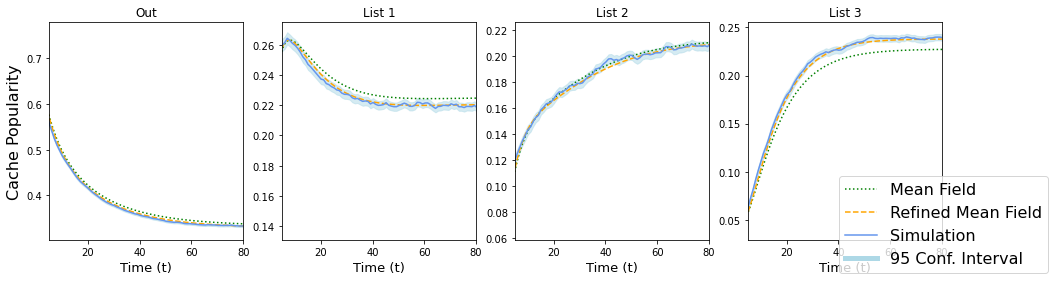

In [8]:


fig, subplot_list = plt.subplots(1, 4, sharey=False)
subplot_list = subplot_list.flatten()

fig.set_size_inches(16, 4)

for k, ax in enumerate(subplot_list):

    cache = k

    hit_conf_bound = (2* _hit_std_caches[:,cache]) / np.sqrt(_nr_simulations)

    ax.plot(mf_times, hit_rate_mf[cache], color="green", linestyle=":")
    ax.plot(rmf_times, hit_rate_rmf[cache], color="orange", linestyle="--")
    ax.plot(_interpolation_times, _hit_mean_caches[:,cache], color="cornflowerblue")
    ax.fill_between(_interpolation_times, (_hit_mean_caches[:,cache] + hit_conf_bound),
                         (_hit_mean_caches[:,cache] - hit_conf_bound), alpha=0.5,color="lightblue")

    ax.set_xlim([5,80])
    
    ax.set_xlabel("Time (t)", fontsize=13)
    if k == 0:
        ax.set_ylabel("Cache Popularity", fontsize=16)
        ax.set_title("Out")
    else:
        ax.set_title('List {}'.format(k))
    # ax.legend()

# fig.suptitle(title, fontsize=16)


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], label="Mean Field", color="green", linestyle=":"),
                Line2D([0], [0], label="Refined Mean Field", color="orange", linestyle="--"),
                Line2D([0], [0], label="Simulation", color="cornflowerblue"),
               Line2D([0], [0], label="95 Conf. Interval", color="lightblue",lw=5)]


fig.legend(handles=custom_lines, loc="lower right", fontsize=16)
    
save_title = "popularities_caches"
plt.savefig(os.path.join(plot_dir, save_title + '.pdf'))
plt.show()


### The next four cells are not dependent on the previous ones. They generate the plot for the single item approximation. The first two cells run the simulations to calculate sample mean and variance

In [3]:
def run_simulations(nr_simulations, nr_items, zipf_alpha, cache_sizes, simulation_time):
# get random list of seed for simulationFunctions
    print(np.power(3,2))
    ## Setup for the model
    # set initial state
    print("Initializing Model")
    print("Parameters:\n\tNr. Simulations: {}\n\tNr. Items: {}\n\tZipf Alpha: {}\n\tCache Size: {}\n\t".format(
        nr_simulations, nr_items, zipf_alpha, cache_sizes) + "Simulations time: {}".format(simulation_time))

    number_of_lists = len(cache_sizes)
    model_dimension = nr_items * (number_of_lists + 1)
    initial_state = np.zeros(model_dimension)
    # we put the first k element in list 1, the next in list 2, etc.
    object_index = nr_items - 1
    initial_obj = np.arange(nr_items)
    # np.random.shuffle(initial_obj)
    # the above line shuffles which elements should be in the cache
    # otherwise the cache are filled in increasing order

    def index(_i, _k, _nr_items):
        return _i + _k * _nr_items

    # specify initial state
    for _list in range(number_of_lists, 0, -1):
        for i in range(cache_sizes[_list-1]):
            initial_state[index(initial_obj[object_index], _list, nr_items)] = 1
            object_index -= 1
    # initialize non cached items
    for i in range(nr_items - sum(cache_sizes)):
        initial_state[index(initial_obj[object_index], 0, nr_items)] = 1
        object_index -= 1

    model = initialize_model(nr_items=nr_items, zipf_alpha=zipf_alpha,
                             cache_sizes=cache_sizes, initial_state=initial_state)
    
    _interpolation_times = np.linspace(0, simulation_time, 200)
    nr_lists = len(cache_sizes)+1
    mean = np.zeros(shape=(nr_lists*nr_items, 200))
    mean_of_squares = np.zeros(shape=(nr_lists*nr_items, 200))
    
    for i, seed in enumerate(np.arange(nr_simulations)):
        T_ctmc, X_ctmc = model.simulate(time=simulation_time, N=1, seed_nr=seed)
        interpolation = interp1d(T_ctmc, X_ctmc, axis=0, kind="previous")
        for k, time in enumerate(_interpolation_times):
            interpolated_sample_path = interpolation(time)
            mean[:,k] += interpolated_sample_path / nr_simulations
            mean_of_squares[:,k] += interpolated_sample_path**2 / nr_simulations
        if i % 100 == 0:
            if i == 0:
                print("Running Simulations")
            else:
                print("\t- " + str(i) + " simulationFunctions done.")        
        
    times = _interpolation_times
    return mean, 2*np.sqrt((mean_of_squares-mean**2)/nr_simulations), times



# Figures 1 & 2

# Change Model parameters here

In [4]:
nr_items=4
zipf_alpha=0.8
cache_sizes=[2]
simulation_time = 30
nr_simulations = 1000
mean, conf, times = run_simulations(nr_simulations, nr_items, zipf_alpha, cache_sizes, simulation_time)

9
Initializing Model
Parameters:
	Nr. Simulations: 1000
	Nr. Items: 4
	Zipf Alpha: 0.8
	Cache Size: [2]
	Simulations time: 30
Running Simulations
	- 100 simulationFunctions done.
	- 200 simulationFunctions done.
	- 300 simulationFunctions done.
	- 400 simulationFunctions done.
	- 500 simulationFunctions done.
	- 600 simulationFunctions done.
	- 700 simulationFunctions done.
	- 800 simulationFunctions done.
	- 900 simulationFunctions done.


/var/folders/1v/l1pcg_zj5gq1xzfgfw8bl3gh0000gn/T/ipykernel_2188/3858952831.py:55: RuntimeWarning: invalid value encountered in sqrt
  return mean, 2*np.sqrt((mean_of_squares-mean**2)/nr_simulations), times


## The next cell calculated the MF and RMF Approximation and a sample path 

In [5]:
cache_path = os.path.join(os.getcwd(), "simulationFunctions", "cache")

filenames = gather_simulations(nr_items=10, zipf_alpha=0.8, cache_sizes=[4], cache_path=cache_path)

path = os.path.join(cache_path, filenames[0])
print(path)
value_dict_single = load_mean_var_mf(file_path=path, output=False)
print(value_dict_single.keys())
#hit_rates_dict_single = calculate_hit_rates(value_dict_single)


def index(_i, _k, _nr_items):
        return _i + _k * _nr_items

number_of_lists = len(cache_sizes)
model_dimension = nr_items * (number_of_lists + 1)
initial_state = np.zeros(model_dimension)
# we put the first k element in list 1, the next in list 2, etc.
object_index = nr_items - 1
initial_obj = np.arange(nr_items)

# specify initial state
for _list in range(number_of_lists, 0, -1):
    for i in range(cache_sizes[_list-1]):
        initial_state[index(initial_obj[object_index], _list, nr_items)] = 1
        object_index -= 1
# initialize non cached items
for i in range(nr_items - sum(cache_sizes)):
    initial_state[index(initial_obj[object_index], 0, nr_items)] = 1
    object_index -= 1

model = initialize_model(nr_items=nr_items, zipf_alpha=zipf_alpha,
                         cache_sizes=cache_sizes, initial_state=initial_state)

# calculate MF, RMF
%time rmf_times, mf_values, rmf_correction, _ = model.meanFieldExpansionTransient(order=1, time=simulation_time)

rmf_values = mf_values + rmf_correction
mf_times = rmf_times

#sim_values, sim_var, sim_std, sim_times = calculate_mean_var_std_from_sums(value_dict)


/Users/sebastian/Documents/PhD/Mean-Field-Approximations-for-Heterogeneous-Systems-It-Works/notebooks and plots/caching/simulationFunctions/cache/sim_mean_var__nr_items-10_zipf_alpha-0.8_simulation_time-80_cache_sizes-4.h5
dict_keys(['cache_sizes', 'initial_state', 'nr_items', 'nr_simulations', 'simulation_time', 'zipf_alpha', 'mf_times', 'mf_values', 'rmf_values', 'sim_times', 'sum_lin_vars', 'sum_squared_hit_rate_caches', 'sum_squared_vars'])
time to compute drift= 3.0994415283203125e-06
CPU times: user 90.4 ms, sys: 827 µs, total: 91.3 ms
Wall time: 92.1 ms


## The next cell plots the results

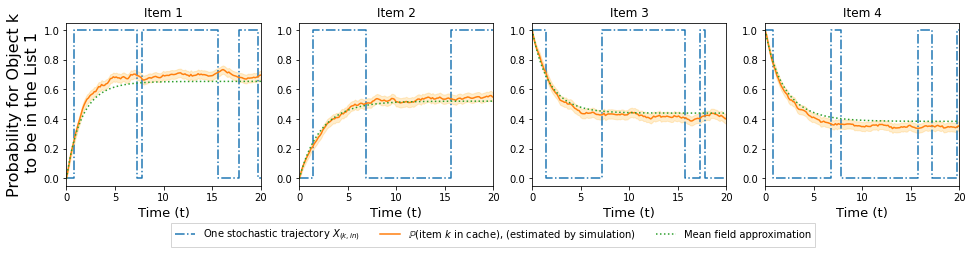

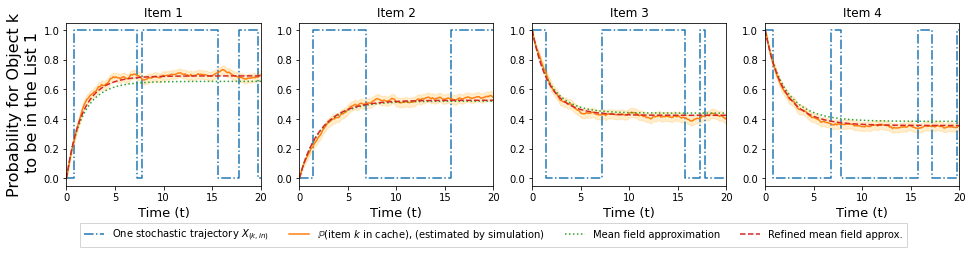

In [6]:
# calculate sample path
T_sample, X_sample = model.simulate(time=simulation_time, N=1, seed_nr=10)
sim_times = times
sim_values = mean


# cache = 2 -> shows plots for second cache ; cache = 1 -> plots for the first cache ;
# cache = 0 -> plot for 'out'
# shows only the plots for the first 5 elements (5 subplots)
cache=1
for plot_rmf in [False, True]:
    fig, subplot_list = plt.subplots(1, 4, sharey=False)
    subplot_list = subplot_list.flatten()

    fig.set_size_inches(16, 3)

    for k, ax in enumerate(subplot_list):

        item = k

        # hit_conf_bound = (2* _hit_std_caches[:,cache]) / np.sqrt(_nr_simulations)

        ax.step(T_sample, X_sample[:,cache*nr_items+k], '-.', label="One sample path", where='post')
        ax.plot(sim_times, sim_values[cache*nr_items+k,:], label="Average over 100 simulations")
        ax.plot(mf_times, mf_values[:,cache*nr_items+ k], linestyle=":", label="Mean Field")
        if plot_rmf:
            ax.plot(rmf_times, rmf_values[:,cache*nr_items+ k], linestyle="--", label="Refined Mean Field")
        ax.set_xlim([0,20])
        ax.fill_between(times, (mean+conf)[cache*nr_items+ k,:], (mean-conf)[cache*nr_items+ k,:], alpha=0.2, color='orange')

        ax.set_xlabel("Time (t)", fontsize=13)
        ax.set_title("Item {}".format(k+1))
        if k == 0:
            ax.set_ylabel("Probability for Object k\n to be in the List {}".format(cache), fontsize=16)

    #fig.legend(handles=custom_lines, loc="upper right", fontsize=16)
    save_title = "probability_cache_single"
    legends = ['One stochastic trajectory $X_{(k,in)}$','$\mathbb{P}$(item $k$ in cache), (estimated by simulation)','Mean field approximation', 'Refined mean field approx.']
    subplot_list[1].legend(labels=legends[0:(4 if plot_rmf else 3)],loc='upper center', 
         bbox_to_anchor=(1, -0.2),fancybox=False, shadow=False, ncol=4)
    if plot_rmf:
        plt.savefig(os.path.join(plot_dir, save_title + '_rmf.pdf'), bbox_inches='tight')
    else:
        plt.savefig(os.path.join(plot_dir, save_title + '.pdf'), bbox_inches='tight')
    plt.show()